In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('data_dim_vente.csv',engine='python')
x=dataset.iloc[:,7].values
y=dataset.iloc[:,5].values
# importing linear regression and spliting the data
dataset

,ID_VENTE,ID_ARTICLE,ID_CLIENT,ID_ESTABLISSEMENT,LIBELLE_VENTE,PRIX_VENTE,DEVISE_VENTE,DATE_VENTE
0,1,ML1212 003001 X,SC000019,1,Polo Homme Taille 3 Coloris Blanc,96.88,EUR,23-08-2012 13:51
1,2,ML1212 003007 X,SC000019,1,Polo Homme Taille 3 Coloris Acidul??,96.88,EUR,06-11-2008 17:01
2,3,ML1212 004001 X,SC000019,1,Polo Homme Taille 4 Coloris Blanc,193.75,EUR,27-06-2016 08:05
3,4,ML1212 004007 X,SC000019,1,Polo Homme Taille 4 Coloris Acidul??,193.75,EUR,16-09-2015 03:34
4,5,ML1212 005001 X,SC000019,1,Polo Homme Taille 5 Coloris Blanc,290.63,EUR,10-03-2017 20:12
5,6,ML1212 005007 X,SC000019,1,Polo Homme Taille 5 Coloris Acidul??,290.63,EUR,17-02-2014 12:14
6,7,ML1212 007001 X,SC000019,1,Polo Homme Taille 6 Coloris Blanc,193.75,EUR,01-01-2010 14:06
7,8,ML1212 007007 X,SC000019,1,Polo Homme Taille 6 Coloris Acidul??,193.75,EUR,01-01-2008 19:37
8,9,ML1212 008001 X,SC000019,1,Polo Homme Taille 7 Coloris Blanc,193.75,EUR,26-12-2017 03:40
9,10,ML1212 008007 X,SC000019,1,Polo Homme Taille 7 Coloris Acidul??,193.75,EUR,28-12-2012 02:55


In [4]:
x

array(['23-08-2012 13:51', '06-11-2008 17:01', '27-06-2016 08:05', ...,
       '16-12-2019 15:56', '13-10-2010 13:14', '17-05-2007 19:26'],
      dtype=object)

In [5]:
y

array([ 96.88,  96.88, 193.75, ...,  18.  , 162.  ,   4.8 ])

In [6]:
mylist=[]
for i in x:
    i=(str(i).replace("-",""))[0:9]
    i=int(i[4:8]+i[2:4]+i[0:2])
    mylist.append(i)

In [9]:
mylist=np.asarray(mylist,dtype=np.int32)
mylist=mylist.reshape(-1,1)
mylist
x=mylist
y


array([ 96.88,  96.88, 193.75, ...,  18.  , 162.  ,   4.8 ])

In [19]:
x

array([[20120823],
       [20081106],
       [20160627],
       ...,
       [20191216],
       [20101013],
       [20070517]])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
# importing fuction of linear regresssion



# It uses Random forest regression technique

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

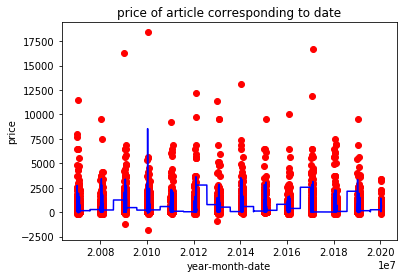

In [18]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('price of article corresponding to date')
plt.xlabel('year-month-date')
plt.ylabel('price')
plt.show()

# here we can  put our value inside the regression.predict fumction


# remember to put value in YYYYMMDD format

## since the traing has been done accourding to Date_vente
### Accourding to given date we can find the value of prix_Vente

In [20]:
regressor.predict([[20120823]])

array([83.59727381])

In [22]:
regressor.predict([[20140217]])

array([520.35176009])

In [24]:
regressor.predict([[20080424]])

array([91.25492857])